In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
from util import Loader
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
loader = Loader('../dataset', 2, 2, {'use_rend':1, 'use_tran': 0, 'augment': 0, 'instr_type': 'complete'})

Using rend from ../dataset/rendering


In [4]:
loader.fake_dirs

{'rend': '../dataset/rendering'}

In [5]:
loader.fakes

['rend']

In [6]:
loader.datasets

{'train': <PrefetchDataset shapes: {synt: (<unknown>, <unknown>), real: (<unknown>, <unknown>)}, types: {synt: (tf.float32, tf.int32), real: (tf.float32, tf.int32)}>,
 'val': <PrefetchDataset shapes: {synt: (<unknown>, <unknown>), real: (<unknown>, <unknown>)}, types: {synt: (tf.float32, tf.int32), real: (tf.float32, tf.int32)}>,
 'test': <PrefetchDataset shapes: {real: (<unknown>, <unknown>, <unknown>)}, types: {real: (tf.float32, tf.int32, tf.string)}>}

In [7]:
# 配置 TensorFlow 会话
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
# config.log_device_placement = True

sess = tf.Session(config=config)

# 创建训练集迭代器
train_iter = loader.iter(set_option='train')

# 获取迭代器句柄
train_handle = sess.run(train_iter.string_handle())

# 创建迭代器切换的占位符和通用迭代器
batch_handle = tf.placeholder(tf.string, shape=[])
batch_iter = tf.data.Iterator.from_string_handle(batch_handle, train_iter.output_types, train_iter.output_shapes)

# 获取当前批次的数据
curbatch = batch_iter.get_next()

# 初始化所有全局和局部变量（特别是迭代器）
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [8]:
# 运行会话并获取 curbatch 的值
curbatch_value = sess.run(curbatch, feed_dict={batch_handle: train_handle})

In [9]:
palette = np.array([
# front
#     [255, 0, 16],  # FK
#     [43, 206, 72],  # BK
#     [255, 255, 128],  # T
#     [0, 255, 127],  # H
#     [94, 241, 242],  # M
#     [34, 139, 34],  # E
#     [0, 191, 255],  # V
#     [0, 129, 69],  # V(R)
#     [255, 0, 190],  # V(L)
#     [255, 164, 4],  # X(R)
#     [0, 117, 220],  # X(L)
#     [255, 109, 21],  # O(5)
#     [122, 0, 136],  # Y
#     [162, 0, 101]  # FO(2)
# complete
    [255, 0, 16],       # FK
    [30, 206, 30],      # BK
    [255, 255, 128],    # T
    [0, 255, 127],     # H,M
    [130, 210, 210],   # M
    [34, 139, 34],     # E,V(L)
    [0, 191, 255],     # V,HM
    [0, 129, 69],      # V(R)
    [255, 0, 190],      # V(L)
    [255, 164, 4],      # X(R)
    [0, 117, 220],      # X(L)
    [179, 179, 179],    # T(F)
    [255, 215, 0],      # V,M
    [255, 105, 180],    # T(B)
    [160, 32, 240],  # M,H(B)
    [139, 69, 19],      # E,V(R)
    [0, 164, 255],      # V,FK
    [255, 30, 30],      # FK, MAK
    [230, 230, 110],    # FT, FKMAK
    [220, 200, 100],    # FT, MBK
    [100, 230, 230],    # M, BK
    [110, 220, 220],    # M, FK
    [20, 200, 255],     # V, BK
    [10, 140, 80],      # VR, FKMAK
    [10, 250, 110],     # H, BK
    [240, 20, 170],     # VL, FKMAK
    [240, 100, 30],     # AO(2)
    [250, 110, 40],    # O(5), AK
    [200, 100, 70],     # O(5), FKBK
    [220, 80, 60],      # BO(2)
    [230, 90, 50],      # O(5), BK
    [130, 10, 120],     # Y, MATBK
    [170, 10, 90],      # FO(2)
    [25, 174, 255]   #V,MH(B)
])

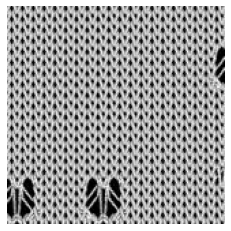

In [10]:
array = curbatch_value['synt'][0]
array = array[0, :, :, 0]

rend = (array - array.min()) / (array.max() - array.min()) * 255
rend = rend.astype(np.uint8)

plt.imshow(rend, cmap='gray')
plt.axis('off')  # 隐藏坐标轴
plt.show()

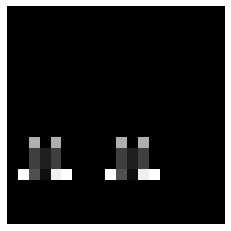

In [11]:
array = curbatch_value['synt'][1]
array = array[0, :, :, 0]

transfer = (array - array.min()) / (array.max() - array.min()) * 255
transfer = transfer.astype(np.uint8)

plt.imshow(transfer, cmap='gray')
plt.axis('off')  # 隐藏坐标轴
plt.show()

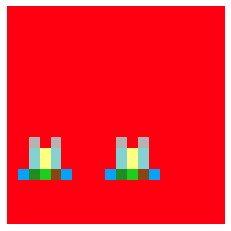

In [12]:
array = curbatch_value['synt'][-1]
array = array[0, :, :, 0]

inst_synt = palette[array]
plt.imshow(inst_synt)
plt.axis('off')  # 隐藏坐标轴
plt.show()

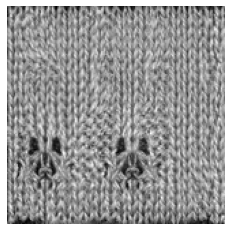

In [13]:
array = curbatch_value['real'][0]
array = array[0, :, :, 0]

real = (array - array.min()) / (array.max() - array.min()) * 255
real = real.astype(np.uint8)

plt.imshow(real, cmap='gray')
plt.axis('off')  # 隐藏坐标轴
plt.show()

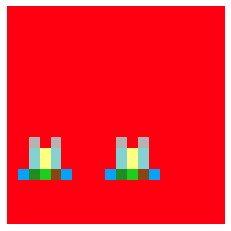

In [14]:
array = curbatch_value['real'][1]
array = array[0, :, :, 0]

inst_real = palette[array]
plt.imshow(inst_real)
plt.axis('off')  # 隐藏坐标轴
plt.show()

In [15]:
tf.squeeze(curbatch_value['real'][1])

<tf.Tensor 'Squeeze:0' shape=(2, 20, 20) dtype=int32>